Total Updates (5-17): 34,226,855
Total Updates (17+): 35,536,240
Correlation: 0.79

Top 5 States:
                 bio_age_5_17  bio_age_17_greater    total
state                                                    
Uttar Pradesh        6207105             3370630  9577735
Maharashtra          3512712             5713427  9226139
Madhya Pradesh       3200117             2723654  5923771
Bihar                2208141             2689446  4897587
Tamil Nadu           2227252             2470865  4698117

Records with Zero Activity: 12
Outlier Threshold (17+): 283 daily updates
Number of Outlier Records found: 22102


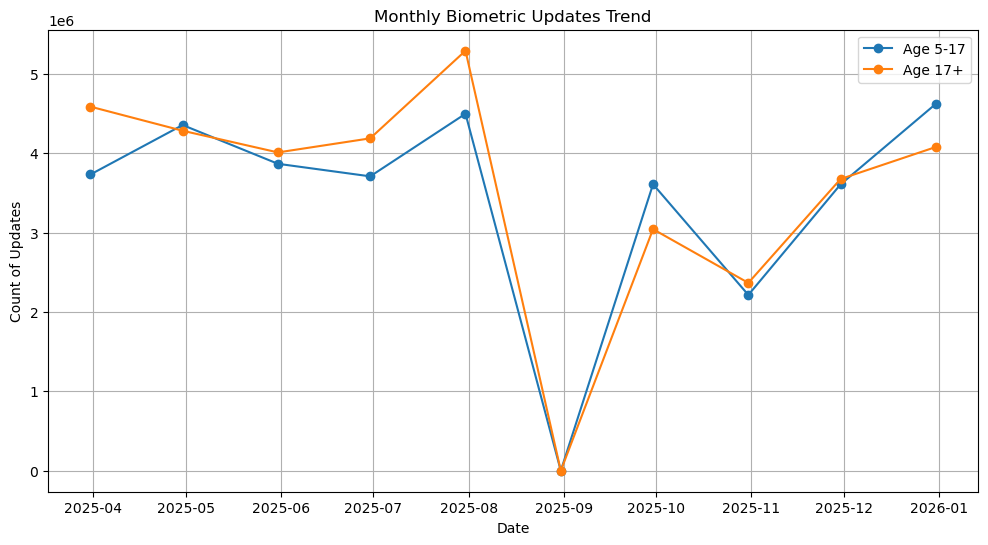

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data & Clean
# --------------------
df = pd.read_csv(r"D:\Aadhar Dataset UIDAI\api_data_aadhar_biometric\api_data_aadhar_biometric\aadhaar_biometric_final_cleaned.csv")
df.rename(columns={'bio_age_17_': 'bio_age_17_greater'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 2. Demographic Analysis
# -----------------------
# Calculate totals
total_5_17 = df['bio_age_5_17'].sum()
total_17_plus = df['bio_age_17_greater'].sum()
print(f"Total Updates (5-17): {total_5_17:,}")
print(f"Total Updates (17+): {total_17_plus:,}")

# Correlation: Do high child updates happen at the same time/place as adult updates?
correlation = df['bio_age_5_17'].corr(df['bio_age_17_greater'])
print(f"Correlation: {correlation:.2f}")

# 3. Geographical Hotspots
# ------------------------
# Aggregate by state to find top performers
state_stats = df.groupby('state')[['bio_age_5_17', 'bio_age_17_greater']].sum()
state_stats['total'] = state_stats.sum(axis=1)
top_states = state_stats.sort_values('total', ascending=False).head(5)
print("\nTop 5 States:\n", top_states)

# 4. Temporal Trends (Time Series)
# --------------------------------
# Resample by Month ('M') or Week ('W') to see trends over time
monthly_trends = df.set_index('date').resample('M')[['bio_age_5_17', 'bio_age_17_greater']].sum()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends['bio_age_5_17'], label='Age 5-17', marker='o')
plt.plot(monthly_trends.index, monthly_trends['bio_age_17_greater'], label='Age 17+', marker='o')
plt.title('Monthly Biometric Updates Trend')
plt.xlabel('Date')
plt.ylabel('Count of Updates')
plt.legend()
plt.grid(True)
plt.savefig('biometric_trends.png') # Save plot to file
# plt.show() # Uncomment if running locally

# 5. Operational Efficiency (Zero Activity)
# -----------------------------------------
# Find days/centers with zero updates reported
zero_activity = df[(df['bio_age_5_17'] == 0) & (df['bio_age_17_greater'] == 0)]
print(f"\nRecords with Zero Activity: {len(zero_activity)}")

# 6. Outlier Detection
# --------------------
# Identify unusually high traffic (e.g., > 3 standard deviations from mean)
threshold = df['bio_age_17_greater'].mean() + (3 * df['bio_age_17_greater'].std())
outliers = df[df['bio_age_17_greater'] > threshold]
print(f"Outlier Threshold (17+): {threshold:.0f} daily updates")
print(f"Number of Outlier Records found: {len(outliers)}")

Total Updates (5-17): 4,863,424
Total Updates (17+): 44,431,763
Correlation: 0.85

Top 5 States:
                 demo_age_5_17  demo_age_17_greater    total
state                                                      
Uttar Pradesh          790308              7752020  8542328
Maharashtra            273322              4781280  5054602
Bihar                  380023              4434327  4814350
West Bengal            242549              3629623  3872172
Madhya Pradesh         407098              2505840  2912938

Records with Zero Activity: 2139
Outlier Threshold (17+): 397 daily updates
Number of Outlier Records found: 12601


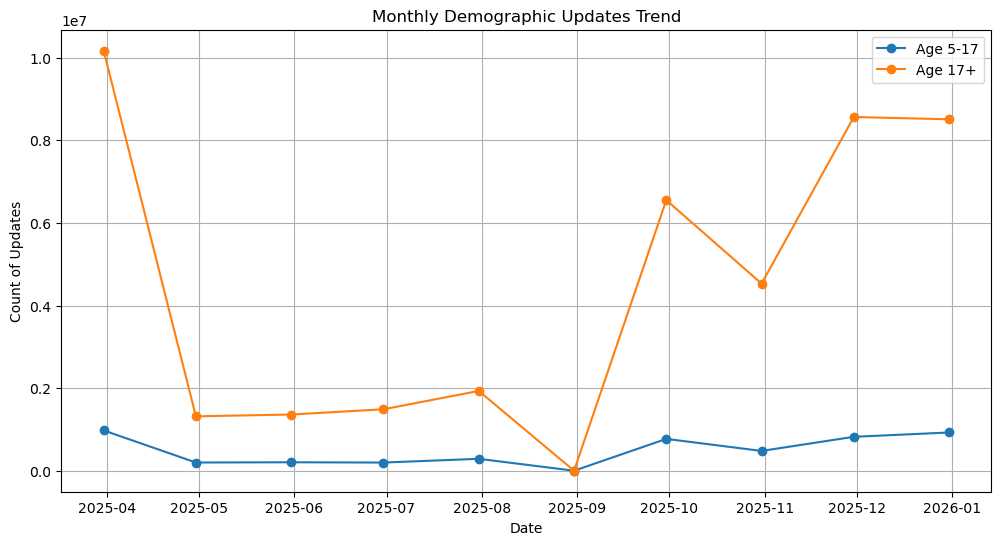

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data & Clean
# --------------------
df = pd.read_csv(r"D:\Aadhar Dataset UIDAI\api_data_aadhar_demographic\api_data_aadhar_demographic\aadhaar_demographic_final_cleaned.csv")
df.rename(columns={'demo_age_17_': 'demo_age_17_greater'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 2. Demographic Analysis
# -----------------------
# Calculate totals
total_5_17 = df['demo_age_5_17'].sum()
total_17_plus = df['demo_age_17_greater'].sum()
print(f"Total Updates (5-17): {total_5_17:,}")
print(f"Total Updates (17+): {total_17_plus:,}")

# Correlation: Do high child updates happen at the same time/place as adult updates?
correlation = df['demo_age_5_17'].corr(df['demo_age_17_greater'])
print(f"Correlation: {correlation:.2f}")

# 3. Geographical Hotspots
# ------------------------
# Aggregate by state to find top performers
state_stats = df.groupby('state')[['demo_age_5_17', 'demo_age_17_greater']].sum()
state_stats['total'] = state_stats.sum(axis=1)
top_states = state_stats.sort_values('total', ascending=False).head(5)
print("\nTop 5 States:\n", top_states)

# 4. Temporal Trends (Time Series)
# --------------------------------
# Resample by Month ('M') or Week ('W') to see trends over time
monthly_trends = df.set_index('date').resample('M')[['demo_age_5_17', 'demo_age_17_greater']].sum()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends['demo_age_5_17'], label='Age 5-17', marker='o')
plt.plot(monthly_trends.index, monthly_trends['demo_age_17_greater'], label='Age 17+', marker='o')
plt.title('Monthly Demographic Updates Trend')
plt.xlabel('Date')
plt.ylabel('Count of Updates')
plt.legend()
plt.grid(True)
plt.savefig('demographic_trends.png') # Save plot to file
# plt.show() # Uncomment if running locally

# 5. Operational Efficiency (Zero Activity)
# -----------------------------------------
# Find days/centers with zero updates reported
zero_activity = df[(df['demo_age_5_17'] == 0) & (df['demo_age_17_greater'] == 0)]
print(f"\nRecords with Zero Activity: {len(zero_activity)}")

# 6. Outlier Detection
# --------------------
# Identify unusually high traffic (e.g., > 3 standard deviations from mean)
threshold = df['demo_age_17_greater'].mean() + (3 * df['demo_age_17_greater'].std())
outliers = df[df['demo_age_17_greater'] > threshold]
print(f"Outlier Threshold (17+): {threshold:.0f} daily updates")
print(f"Number of Outlier Records found: {len(outliers)}")

<Figure size 1200x600 with 0 Axes>

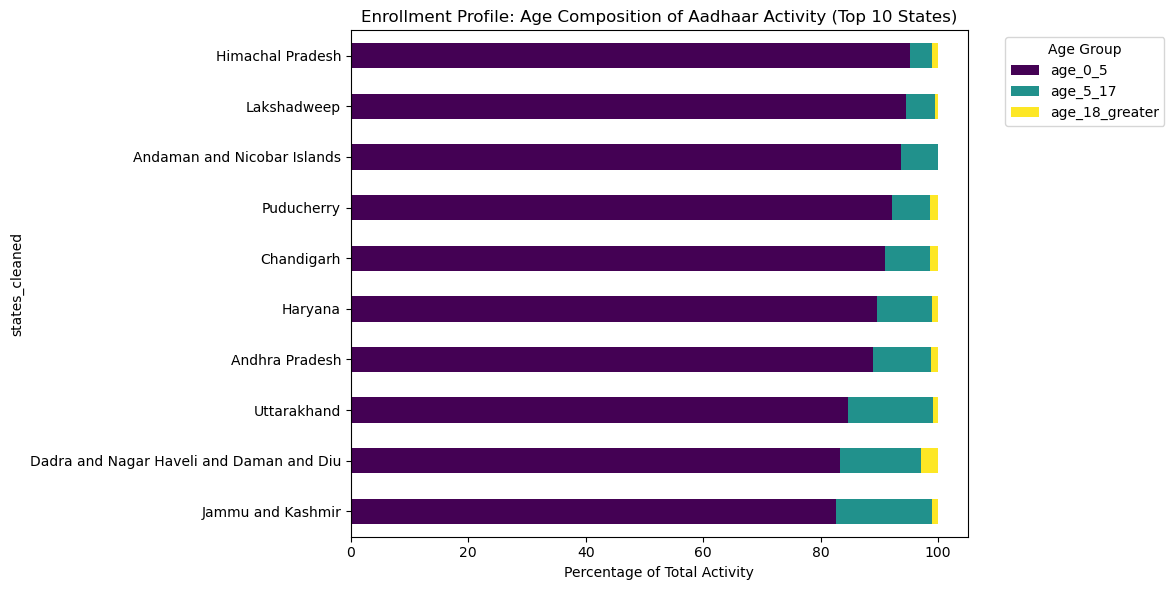

C:\Users\DELL\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


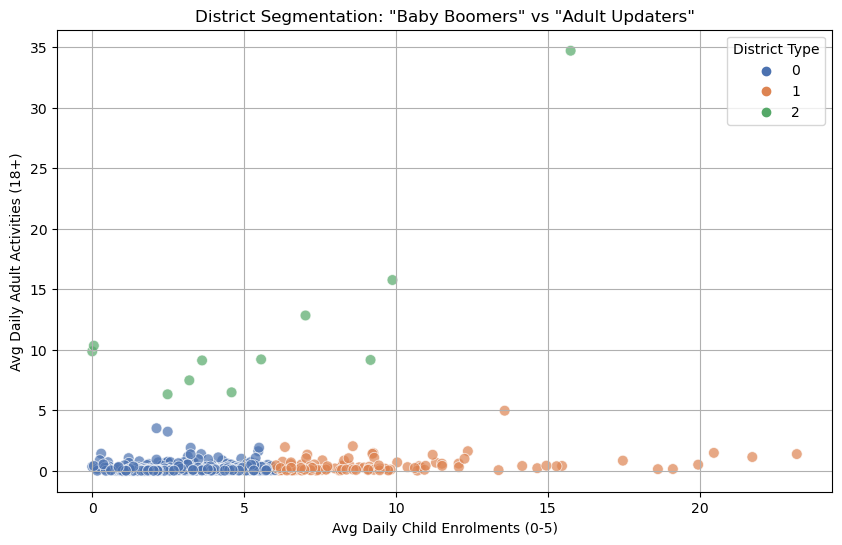

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ==========================================
# 1. LOAD & PREPROCESS
# ==========================================
df = pd.read_csv(r"D:\Aadhar Dataset UIDAI\api_data_aadhar_enrolment\api_data_aadhar_enrolment\aadhaar_enrolment_final_cleaned.csv")

# Convert Date
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Create "Total Activity" and "Month" features
df['Total_Activity'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
df['Month'] = df['date'].dt.to_period('M')

# ==========================================
# 2. ANALYSIS A: DEMOGRAPHIC SPLIT (State-wise)
# ==========================================
# We want to see which states have the youngest enrolment profile
state_age = df.groupby('states_cleaned')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
# Normalize to percentages to compare fairl
state_age_pct = state_age.div(state_age.sum(axis=1), axis=0) * 100
# Sort by '0-5' to see states with highest child enrolment focus
state_age_pct = state_age_pct.sort_values('age_0_5', ascending=True).tail(10)

plt.figure(figsize=(12, 6))
state_age_pct.plot(kind='barh', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Enrollment Profile: Age Composition of Aadhaar Activity (Top 10 States)')
plt.xlabel('Percentage of Total Activity')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# ==========================================
# 3. ANALYSIS C: DISTRICT CLUSTERING (The "Winning" Insight)
# ==========================================
# We will group districts based on their "Activity Mix"
district_profile = df.groupby('district')[['age_0_5', 'age_18_greater']].mean()

# Normalize data for Machine Learning
scaler = StandardScaler()
scaled_data = scaler.fit_transform(district_profile)

# Fit K-Means (3 Clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
district_profile['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=district_profile, x='age_0_5', y='age_18_greater', 
                hue='Cluster', palette='deep', s=60, alpha=0.7)
plt.title('District Segmentation: "Baby Boomers" vs "Adult Updaters"')
plt.xlabel('Avg Daily Child Enrolments (0-5)')
plt.ylabel('Avg Daily Adult Activities (18+)')
plt.legend(title='District Type')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

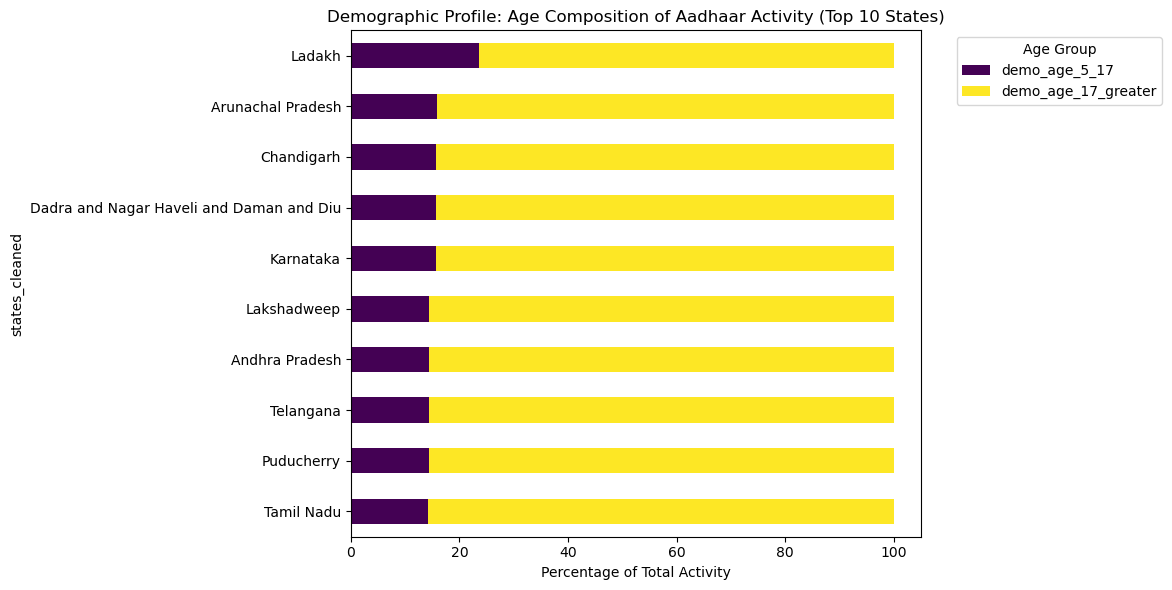

C:\Users\DELL\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


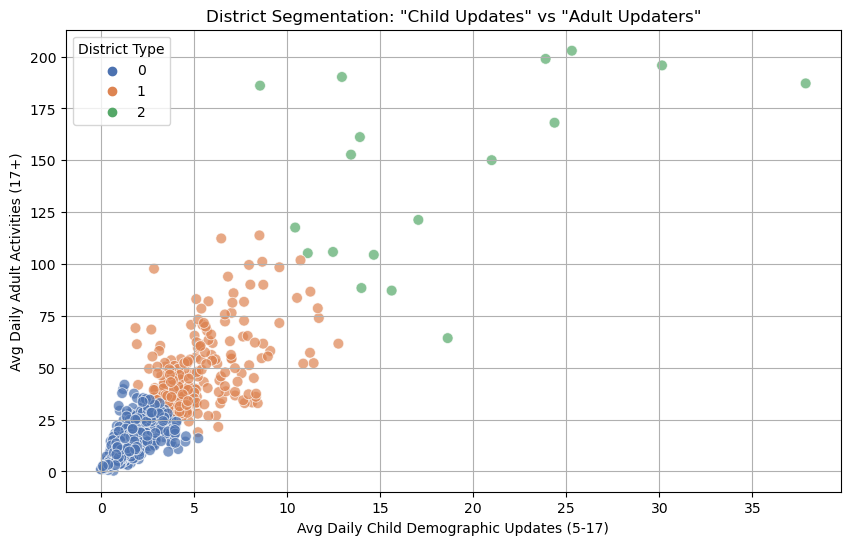

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ==========================================
# 1. LOAD & PREPROCESS
# ==========================================
df = pd.read_csv(r"D:\Aadhar Dataset UIDAI\api_data_aadhar_demographic\api_data_aadhar_demographic\aadhaar_demographic_final_cleaned.csv")

# Convert Date
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Create "Total Activity" and "Month" features
df['Total_Activity'] = df['demo_age_5_17'] + df['demo_age_17_greater']
df['Month'] = df['date'].dt.to_period('M')

# ==========================================
# 2. ANALYSIS A: DEMOGRAPHIC SPLIT (State-wise)
# ==========================================
# We want to see which states have the youngest enrolment profile
state_age = df.groupby('states_cleaned')[['demo_age_5_17', 'demo_age_17_greater']].sum()
# Normalize to percentages to compare fairl
state_age_pct = state_age.div(state_age.sum(axis=1), axis=0) * 100
# Sort by '0-5' to see states with highest child enrolment focus
state_age_pct = state_age_pct.sort_values('demo_age_5_17', ascending=True).tail(10)

plt.figure(figsize=(12, 6))
state_age_pct.plot(kind='barh', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Demographic Profile: Age Composition of Aadhaar Activity (Top 10 States)')
plt.xlabel('Percentage of Total Activity')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


# ==========================================
# 3. ANALYSIS C: DISTRICT CLUSTERING (The "Winning" Insight)
# ==========================================
# We will group districts based on their "Activity Mix"
district_profile = df.groupby('district')[['demo_age_5_17', 'demo_age_17_greater']].mean()

# Normalize data for Machine Learning
scaler = StandardScaler()
scaled_data = scaler.fit_transform(district_profile)

# Fit K-Means (3 Clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
district_profile['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=district_profile, x='demo_age_5_17', y='demo_age_17_greater', 
                hue='Cluster', palette='deep', s=60, alpha=0.7)
plt.title('District Segmentation: "Child Updates" vs "Adult Updaters"')
plt.xlabel('Avg Daily Child Demographic Updates (5-17)')
plt.ylabel('Avg Daily Adult Activities (17+)')
plt.legend(title='District Type')
plt.grid(True)
plt.show()